In [1]:
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_new = pd.read_csv("df_new.csv")

In [4]:
df_new.head()

,_id,likes_received,bio,college,gender,height,interests,is_habit_drink,is_habit_smoke,is_verified,...,type,what_to_find,who_to_date,is_subscribed,id,is_unmatch,like_count,profile_score,age,days_since_creation
0,1189,173.0,"['want', 'become', 'ia']",none,F,prefer not to say,"['[""singing"",""dancing""]']",N,N,False,...,U,C,M,True,43728,False,1,30,19,15
1,392,1.0,"['hey', ""i'm"", 'looking', 'good', 'friend', '😊']",none,M,prefer not to say,"['[""dancing"",""design"",""badminton"",""tennis"",""fo...",S,O,False,...,U,CON,F,True,17608,False,1,30,25,24
2,392,1.0,"['hey', ""i'm"", 'looking', 'good', 'friend', '😊']",none,M,prefer not to say,"['[""dancing"",""design"",""badminton"",""tennis"",""fo...",S,O,False,...,U,CON,F,True,17609,False,1,30,25,24
3,392,1.0,"['hey', ""i'm"", 'looking', 'good', 'friend', '😊']",none,M,prefer not to say,"['[""dancing"",""design"",""badminton"",""tennis"",""fo...",S,O,False,...,U,CON,F,True,17610,False,1,30,25,24
4,392,1.0,"['hey', ""i'm"", 'looking', 'good', 'friend', '😊']",none,M,prefer not to say,"['[""dancing"",""design"",""badminton"",""tennis"",""fo...",S,O,False,...,U,CON,F,True,19350,False,1,30,25,24


In [5]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# select non-numeric columns from the dataset
cat_cols = df_new.select_dtypes(include=['object']).columns

# iterate through each categorical column and convert it to numeric
for col in cat_cols:
    if col not in ['column1', 'column2', ...]:  # skip specific columns if needed
        df_new[col] = le.fit_transform(df_new[col].astype(str))

In [6]:
df_new['status'].astype(int)
df_new['is_unmatch'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
63881    0
63882    0
63883    0
63884    0
63885    0
Name: is_unmatch, Length: 63886, dtype: int64

In [8]:
# Instantiating the Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_new)


In [9]:
inertia_list = []
for cluster in range(1, 16): 
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    
    kmeans.fit(data_scaled)
    
    temp_inertia = kmeans.inertia_

    inertia_list.append(temp_inertia)

Text(0, 0.5, 'Inertia')

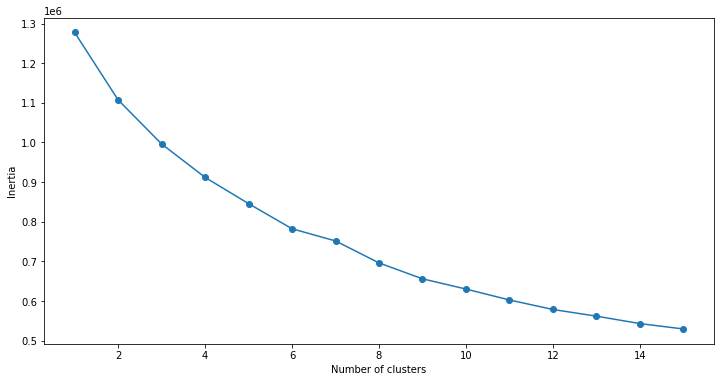

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
##number of cluster: 6-8

In [11]:




pred = kmeans.predict(df_new)

In [12]:
pred

array([0, 3, 3, ..., 5, 5, 5], dtype=int32)

In [26]:
kmeans = KMeans(n_clusters = 6 ,init='k-means++')


# Fitting
kmeans.fit(df_new)
# Getting cluster assignments
cluster_assignments = kmeans.labels_

# Assigning the clusters to each profile
df_new['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df_new

import pickle
with open("modelTest1.pkl", "wb") as f:
    pickle.dump(df_new, f)

In [17]:
df_new.drop(['id'], axis = 1)

,_id,likes_received,bio,college,gender,height,interests,is_habit_drink,is_habit_smoke,is_verified,...,type,what_to_find,who_to_date,is_subscribed,is_unmatch,like_count,profile_score,age,days_since_creation,Cluster #
0,1189,173.0,700,1,0,82,597,0,0,0,...,0,0,2,0,False,1,30,1,15,0
1,392,1.0,271,1,1,82,243,2,1,0,...,0,1,1,0,False,1,30,7,24,3
2,392,1.0,271,1,1,82,243,2,1,0,...,0,1,1,0,False,1,30,7,24,3
3,392,1.0,271,1,1,82,243,2,1,0,...,0,1,1,0,False,1,30,7,24,3
4,392,1.0,271,1,1,82,243,2,1,0,...,0,1,1,0,False,1,30,7,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63881,969,220.0,763,1,0,82,639,3,3,1,...,0,5,2,0,False,2,70,0,18,4
63882,969,220.0,763,1,0,82,639,3,3,1,...,0,5,2,0,False,2,70,0,18,4
63883,969,220.0,763,1,0,82,639,3,3,1,...,0,5,2,0,False,2,70,0,18,4
63884,969,220.0,763,1,0,82,639,3,3,1,...,0,5,2,0,False,2,70,0,18,4


In [21]:
# Set the 'ID' column as the index
df_new = df_new.set_index('_id')

# Filter rows based on cluster number
cluster_num = 0
cluster_df = df_new[df_new['Cluster #'] == cluster_num]

# Select 10 random people from the cluster
num_people = 10
selected_people = cluster_df.sample(n=num_people)

# Extract IDs of the selected people
selected_ids = selected_people.index

# Print the selected IDs
print(selected_ids)


Int64Index([1235, 778, 739, 484, 830, 940, 1162, 173, 692, 972], dtype='int64', name='_id')


In [22]:
df_new.columns

Index(['likes_received', 'bio', 'college', 'gender', 'height', 'interests',
       'is_habit_drink', 'is_habit_smoke', 'is_verified', 'status', 'type',
       'what_to_find', 'who_to_date', 'is_subscribed', 'id', 'is_unmatch',
       'like_count', 'profile_score', 'age', 'days_since_creation',
       'Cluster #'],
      dtype='object')

In [23]:
# Get user input for other criteria
min_age = input("Enter the minimum age: ")
max_age = input("Enter the maximum age: ")
min_likes_received = input("Enter the minimum likes received: ")
max_likes_received = input("Enter the maximum likes received: ")
min_height = input("Enter the minimum height: ")
max_height = input("Enter the maximum height: ")
# Repeat for other columns as needed

# Filter the DataFrame based on the user input
filtered_df = df_new[(df_new['age'] >= int(min_age)) & 
                     (df_new['age'] <= int(max_age)) & 
                     (df_new['likes_received'] >= int(min_likes_received)) & 
                     (df_new['likes_received'] <= int(max_likes_received)) & 
                     (df_new['height'] >= int(min_height)) & 
                     (df_new['height'] <= int(max_height))]
# Repeat for other columns as needed

# Show the available clusters based on the filtered DataFrame
available_clusters = filtered_df['Cluster #'].unique()
print("Available clusters:", available_clusters)

# Get user input for the cluster number
cluster_num = input("Enter the cluster number: ")

# Filter the DataFrame again based on the cluster number
filtered_df = filtered_df[filtered_df['Cluster #'] == int(cluster_num)]

# Get the first 10 profiles from the filtered DataFrame
top_profiles = filtered_df.head(10)

# Display the top 10 profiles
print(top_profiles)


Enter the minimum age: 19
Enter the maximum age: 23
Enter the minimum likes received: 200
Enter the maximum likes received: 300
Enter the minimum height: 15
Enter the maximum height: 70
Available clusters: []
Enter the cluster number: 2
Empty DataFrame
Columns: [likes_received, bio, college, gender, height, interests, is_habit_drink, is_habit_smoke, is_verified, status, type, what_to_find, who_to_date, is_subscribed, id, is_unmatch, like_count, profile_score, age, days_since_creation, Cluster #]
Index: []

[0 rows x 21 columns]
